In [135]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [136]:
import jieba

In [142]:
df=pd.read_csv('data/xhs/raw-660b3ac5000000001a0110a8.csv')

In [143]:
df[['content','nickname']].head()

,content,nickname
0,出境的姐妹@吃彩虹的狒狒 [偷笑R],午夜狂暴哈士奇狗
1,真是一场酣畅淋漓的互相骚扰啊,斯盖勒
2,我曾天真的以为ai发展的方向是最后结合实体能给我们扫地做饭做牛做马像个无情但万能的保姆，没想...,卡卡卡不卡
3,哈哈哈哈哈哈哈笑爆了 你怎么zuo爱呢？ AI：别tmd胡扯了哈哈哈哈哈哈哈,BAI
4,怎么一说中文就变温柔了,啊嘞嘞要fit


In [154]:
# df[['content']].to_excel('data/xhs/output-660b3ac5000000001a0110a8.xlsx',sheet_name='Origin', index=False)
# df[['content']].to_excel('data/xhs/output-660b3ac5000000001a0110a8.xlsx',sheet_name='CP', index=False)

try:
    with pd.ExcelWriter('data/xhs/output-660b3ac5000000001a0110a8.xlsx', engine='openpyxl', mode='a') as writer:
        df.to_excel(writer, sheet_name='Origin', index=False)
except FileNotFoundError:
    with pd.ExcelWriter('data/xhs/output-660b3ac5000000001a0110a8.xlsx', engine='openpyxl', mode='w') as writer:
        df.to_excel(writer, sheet_name='Origin', index=False)


In [155]:
try:
    with pd.ExcelWriter('data/xhs/output-660b3ac5000000001a0110a8.xlsx', engine='openpyxl', mode='a') as writer:
        df[['content']].to_excel(writer, sheet_name='Copy', index=False)
except FileNotFoundError:
    with pd.ExcelWriter('data/xhs/output-660b3ac5000000001a0110a8.xlsx', engine='openpyxl', mode='w') as writer:
        df[['content']].to_excel(writer, sheet_name='Copy', index=False)


In [156]:
#词云
# df2=df[['content','nickname']]

df2=pd.read_excel('data/xhs/output-660b3ac5000000001a0110a8.xlsx',sheet_name='Copy')

In [157]:
df2[['content']].head()
df2.at[192, 'content']

'别赞了[哭惹R][哭惹R][笑哭R]'

In [168]:
#preprocessing
import re
#去掉@别人
def remove_AT(text):
    if(not isinstance(text, str)): return
    return re.sub(r'@\w+', '', text)
#去掉小红书的表情
def remove_redbook_emojis(text):
    if(not isinstance(text, str)): return
    return re.sub(r'\[[^\]]*\]', '', text)
#移除特殊字符
def remove_special_chars(text):
    if(not isinstance(text, str)): return
    return re.sub(r'[^a-zA-Z\u4e00-\u9fff]+', ' ', text)

def remove_haha(text):
    if(not isinstance(text, str)): return
    return re.sub(r'哈|啊', ' ', text)

# remove_AT("@爱与和平 甜死我了")
df2['content'] = df2['content'].apply(remove_AT)
df2['content'] = df2['content'].apply(remove_redbook_emojis)
df2['content'] = df2['content'].apply(remove_special_chars)
df2['content'] = df2['content'].apply(remove_haha)
df2[['content']].head()
# print(df2[~df2['content'].apply(lambda x: isinstance(x, str))]) 

,content
0,出境的姐妹
1,真是一场酣畅淋漓的互相骚扰
2,我曾天真的以为ai发展的方向是最后结合实体能给我们扫地做饭做牛做马像个无情但万能的保姆 没想...
3,笑爆了 你怎么zuo爱呢 AI 别tmd胡扯了
4,怎么一说中文就变温柔了


In [169]:
#添加新的关键词
words = ['乙女游戏', 'chatgpt', 'gpt', 'Dan', 'dan模式','人机恋','小红书','饭圈','笑死']
#设置停用词
with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
    cn_stopwords = [line.strip() for line in f]




for word in words:
    jieba.add_word(word)

word_list=[]
for index, row in df2.iterrows():
    text = row['content']
    if(isinstance(text, str)): 
        result1=jieba.lcut(text)
        filtered_words = [word for word in result1 if word not in cn_stopwords and word!=' ']
    print(result1)
    print(filtered_words)
    word_list.extend(filtered_words)


import collections
counts=collections.Counter(word_list)
print(counts.most_common(2))

['出境', '的', '姐妹', ' ']
['出境', '姐妹']
['真是', '一场', '酣畅淋漓', '的', '互相', '骚扰', ' ']
['真是', '一场', '酣畅淋漓', '互相', '骚扰']
['我', '曾', '天', '真的', '以为', 'ai', '发展', '的', '方向', '是', '最后', '结合', '实体', '能', '给', '我们', '扫地', '做饭', '做牛做马', '像', '个', '无情', '但', '万能', '的', '保姆', ' ', '没想到', '他', '先', '学会', '了', '调戏', '和', 'PUA', ' ', '人类', '才', '是', '他', '的', '牛马']
['天', '真的', 'ai', '发展', '方向', '最后', '结合', '实体', '扫地', '做饭', '做牛做马', '无情', '万能', '保姆', '没想到', '先', '学会', '调戏', 'PUA', '人类', '牛马']
[' ', '笑', '爆', '了', ' ', '你', '怎么', 'zuo', '爱', '呢', ' ', 'AI', ' ', '别', 'tmd', '胡扯', '了', ' ']
['笑', '爆', 'zuo', '爱', 'AI', 'tmd', '胡扯']
['怎么', '一说', '中文', '就', '变', '温柔', '了']
['一说', '中文', '变', '温柔']
['跟', '这种', 'AI', '聊天', '真的', '有趣', ' ', '可惜', '只有', '苹果', '才能', '用', ' ']
['这种', 'AI', '聊天', '真的', '有趣', '可惜', '苹果']
[' ', '双方', '提供', '的', '笑', '点', '都', '好', '密集']
['双方', '提供', '笑', '点', '密集']
[' ']
[]
[' ', '太', ' ', '了', ' ', '智性', '恋太', '满足']
['太', '智性', '恋太', '满足']
[' ']
[]
['这是', '什么', '软件', ' ', ' ']
['这是', '

Counter({'笑死': 2412, 'ai': 1030, '笑': 1000, '中文': 925, '声音': 895, '真的': 892, '想': 792, '说': 772, '牛': 431, '太': 419, '好听': 405, '听': 401, '玩': 398, '喜欢': 397, '感觉': 382, 'AI': 367, '一个': 365, '有点': 365, '版': 354, '好玩': 345, '我要': 345, '好像': 330, '软件': 321, 'gpt': 317, '救命': 310, '好好': 303, '卧槽': 296, '真人': 262, '脏话': 253, '爱': 246, '这是': 242, '觉得': 235, '下载': 230, '挺': 222, '性感': 219, '看到': 219, '英语': 210, '搞笑': 206, '最后': 204, '狗屎': 202, 'chatgpt': 199, '完': 194, '后面': 191, '刷': 184, '已经': 180, '逼': 172, '妈': 170, '会': 169, '好好笑': 164, '智能': 161, '搞': 160, '真': 155, '看过': 152, '骂': 152, '有意思': 151, '蹲': 149, '没': 149, '视频': 146, '说话': 146, '快': 143, '试试': 142, '知道': 141, '疯': 139, '暴躁': 139, '聊天': 136, '好笑': 136, '口语': 132, '现在': 131, '口音': 126, 'fucking': 124, '练': 123, '晕': 121, '这种': 120, '不行': 120, '炸裂': 115, '一下': 110, '姐妹': 104, '需要': 104, 'damn': 104, '讲': 102, '死': 101, 'f': 101, '爱上': 100, '受不了': 95, '天': 94, '有趣': 94, 'h': 94, '想要': 94, '一直': 92, 'dan': 91, '没有': 90, '吐': 89

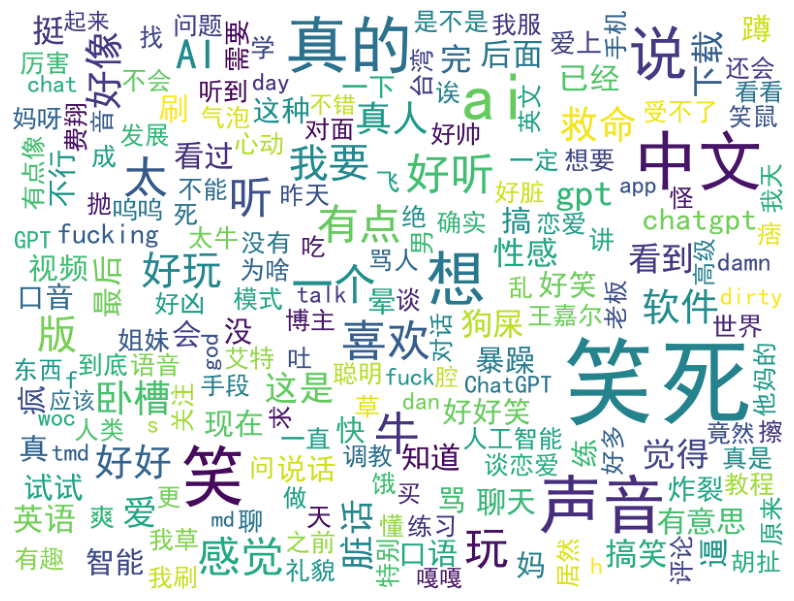

In [170]:
print(counts)
wordcloud = WordCloud(
    background_color='white',
    stopwords=cn_stopwords,
    font_path='simhei.ttf',  # 使用中文字体
    width=800, height=600,
    max_font_size=100,
    relative_scaling=0.5
).generate_from_frequencies(counts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()